In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np
import pandas as pd

In [42]:
file_name="C:\Ashish\work\RFP_\Incident_Jun2018_May2019.xlsx"
sheet_name="Incidents 012018-052019"
column_name="Description"
total_clusters=20
result_file_name=r"C:\Ashish\work\RFP_\result_Incident_Jun2018_May2019.xlsx"
filepath=r"C:\Ashish\work\RFP_"

#file_name=r"C:\Users\smehra\OneDrive - Capgemini\Documents\D\office\ai ml\Incident_1.xlsx"
#'''file_name="C:\Ashish\work\RFP_\Incident_Jun2018_May2019.xlsx"
#sheet_name="Sheet1"
#column_name="Description"
#total_clusters=20
#filepath=r"C:\Users\smehra\OneDrive - Capgemini\Documents\D\office\ai ml"
#result_file_name=r"C:\Users\smehra\OneDrive - Capgemini\Documents\D\office\ai ml\result_Incident_Jun2018_May2019.xlsx"'''

In [43]:
df = pd.read_excel(file_name, sheet_name=sheet_name, skip_blank_lines=True)
# word_list = []
prediction_list = []
df = df.replace(np.nan, '', regex=True)
print(len(df))
data = df[column_name].astype(str)
documents = data.tolist()
print('1--1')
vectorizer = TfidfVectorizer(stop_words='english')
print('1@@1')

X = vectorizer.fit_transform(documents)
print('1---1')
model = KMeans(n_clusters=int(total_clusters), init='k-means++', max_iter=100, n_init=1)
model.fit(X)
print('11')
#get clasification result
i=0
for row_index, row in df.iterrows():
    i = i + 1
    if i % 1000 == 0:
        print(i)
    Y = vectorizer.transform([str(row[column_name])])
    prediction = model.predict(Y)
    category=str(prediction).replace('[','').replace(']','')
    prediction_list.append(category)
df['Category'] = prediction_list
writer = pd.ExcelWriter("result_Incident_Jun2018_May2019.xlsx", engine='openpyxl')
df.to_excel(writer, sheet_name,index = False)

1845
1--1
1@@1
1---1
11
1000


In [44]:



df


,Number,Task type,Short description,Created,Created by,Name,Priority,State,Assigned to,Assignment Group,...,Approval history,Approval,Affected contact,Additional comments,Additional assignee list,Actual start,Actual end,Activity due,Active,Category
0,INC0022370,Incident,Error while closing period of May month due to...,2019-05-31 22:28:54,110856,Ruchi Ruchi,4 - Low,Closed,Madhuri Mella,Custom Fleet Application Support - Core,...,,Not Yet Requested,,20/06/2019 17:41:31 - Madhuri Mella (Additiona...,,,,,False,2
1,INC0022369,Incident,Bynx State Change CM012,2019-05-31 16:43:55,110954,Robbie Giusti,4 - Low,Closed,Rajnish Singh,Custom Fleet Application Support - Core,...,,Not Yet Requested,,11/06/2019 16:45:07 - Rajnish Singh (Additiona...,,,,,False,0
2,INC0022367,Incident,transaction log for database 'Evolve.IMS.Datab...,2019-05-31 13:13:35,110709,Harish Sharma,3 - Moderate,Closed,Suresh Reddy,DBA Support,...,,Not Yet Requested,,31/05/2019 22:12:03 - Suresh Reddy (Additional...,,,,,False,0
3,INC0022365,Incident,Bynx error- cannot accept revision - 1EN2AV,2019-05-31 10:14:36,110947,Stephen McMillan,4 - Low,Closed,Vijaya Lakshmi Palanisamy,Custom Fleet Application Support - Core,...,,Not Yet Requested,Anusha Singh,28/06/2019 22:19:11 - Vijaya Lakshmi Palanisam...,,,,,False,5
4,INC0022364,Incident,Driver is experiencing issues with logging int...,2019-05-31 10:10:58,110947,Stephen McMillan,4 - Low,Closed,Prashant Srivastava,Web Support,...,,Not Yet Requested,,13/06/2019 22:18:14 - Sandeep Kaikkottil (Addi...,,,,,False,17
5,INC0022363,Incident,RE: insurance quote unable to approve for orde...,2019-05-31 09:50:19,110719,Ranjith Byereddy,3 - Moderate,Closed,Ranjith Byereddy,Web Support,...,,Not Yet Requested,,04/06/2019 15:24:27 - Ranjith Byereddy (Additi...,,,,,False,0
6,INC0022362,Incident,Rental not generating for formal extension 295...,2019-05-31 09:47:32,110954,Robbie Giusti,4 - Low,In Progress,Rajnish Singh,Custom Fleet Application Support - Core,...,,Not Yet Requested,,01/07/2019 13:43:12 - Mariel Campos (Additiona...,,,,,True,0
7,INC0022361,Incident,Under over utilization report doesn't pick up ...,2019-05-31 09:46:52,110947,Stephen McMillan,4 - Low,Closed,Sneha Shingte,Custom Fleet Application Support - Core,...,,Not Yet Requested,,20/06/2019 16:26:27 - Sneha Shingte (Additiona...,,,,,False,17
8,INC0022357,Incident,Issue with CTP GST for EV Vehicle,2019-05-31 09:45:46,110954,Robbie Giusti,4 - Low,In Progress,Satya Alapati,Custom Fleet Application Support - Core,...,,Not Yet Requested,,09/07/2019 01:19:57 - Satya Alapati (Additiona...,,,,,True,0
9,INC0022360,Incident,unable to cancel quote,2019-05-31 09:44:06,110947,Stephen McMillan,4 - Low,Closed,Anil Reddy Kota,Custom Fleet Application Support - Core,...,,Not Yet Requested,,13/06/2019 19:43:20 - Anil Reddy Kota (Additio...,,,,,False,17


In [45]:
df2=df[['Category','Description']]

In [46]:
df2=df2.sort_values("Category")

In [47]:
d= {}
for i in df2['Category'].unique():
    d[i] = [df2['Description'][j] for j in df2[df2['Category']==i].index]

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
threshold=0.8
x_sim={}
x_uni={}
for i in d.keys():
    x=[]
    print("--------------------------------------------------------------------------------------------------------------------")
    print("Category: "+str(i))
    print()
    print("number of cases: " + str(len(d[i])))
    #print(d[i])
    #for k in d[i]:
    if(len(d[i])>1):
        x=d[i]
        tfidf_vectorizer = TfidfVectorizer()
        tfidf_matrix = tfidf_vectorizer.fit_transform(x)
        #print(tfidf_matrix.shape)
        cos_sim=cosine_similarity(tfidf_matrix[0:len(d[i])], tfidf_matrix)
        #print(cos_sim)
        index=[i for i in range(1,len(cos_sim)+1)]
        col=["col "+str(i) for i in range(1,len(cos_sim)+1)]
        df_sim=pd.DataFrame(data=cos_sim[0:,0:],
                            index=index,
                            columns= col)
      
        #print(df_sim)
        count =0;
        for j in range(1,len(df_sim)+1):
            seriesObj = df_sim.apply(lambda x: True if x['col '+ str(j)] > threshold else False , axis=1)
            numOfRows = len(seriesObj[seriesObj == True].index)
            #print("number of rows: ",numOfRows)
            if(numOfRows>0):
                count=count+numOfRows-1;
            #count=count/2
            #print("count: ",count," rows: ",numOfRows)
        #print(count)
        #count=count-len(cos_sim)
        count=round(count/2)
        print("count: ",count)
        if(count<=0):
            count=0;
            x_sim[i]=count
            print("x_sim: ", x_sim[i])
            x_uni[i]=len(cos_sim)
            print("x_uni: ", x_uni[i])
        else:
            #print(count)
            #x_sim[i]=round(count/(len(cos_sim)))
            if(count>len(cos_sim)):
                count=len(cos_sim)-round(count/(len(cos_sim)))
                x_sim[i]=count
                print("x_sim: ", x_sim[i])
                x_uni[i]=len(cos_sim)-count
                print("x_uni: ", x_uni[i])
            else:
                x_sim[i]=count
                print("x_sim: ", x_sim[i])
                x_uni[i]=len(cos_sim)-count
                print("x_uni: ", x_uni[i])
                #x_sim[i]=round(count/2)
                #x_uni[i]=len(cos_sim)-round(count/2)
            #x_uni[i]=len(cos_sim)-round(count/(len(cos_sim)))
        #print(count)
    else:
        x_sim[i]=0
        print("x_sim: ", x_sim[i])
        x_uni[i]=1
        print("x_uni: ", x_uni[i])
print(x_sim)
print(x_uni)

--------------------------------------------------------------------------------------------------------------------
Category: 0

number of cases: 1205
count:  41
x_sim:  41
x_uni:  1164
--------------------------------------------------------------------------------------------------------------------
Category: 1

number of cases: 45
count:  35
x_sim:  35
x_uni:  10
--------------------------------------------------------------------------------------------------------------------
Category: 10

number of cases: 2
count:  0
x_sim:  0
x_uni:  2
--------------------------------------------------------------------------------------------------------------------
Category: 11

number of cases: 13
count:  39
x_sim:  10
x_uni:  3
--------------------------------------------------------------------------------------------------------------------
Category: 12

number of cases: 1
x_sim:  0
x_uni:  1
-------------------------------------------------------------------------------------------------

In [52]:
#uni_sim=[x_sim,x_uni]
df_sim_uni=pd.DataFrame(list(x_sim.items()), columns=['Category', 'Similar Count'])
df_sim_uni['Unique']= df_sim_uni['Category'].map(x_uni)

In [53]:
df_sim_uni

,Category,Similar Count,Unique
0,0,41,1164
1,1,35,10
2,10,0,2
3,11,10,3
4,12,0,1
5,13,1,1
6,14,0,3
7,15,13,57
8,16,0,1
9,17,4,325


In [54]:
df_sim_uni.to_excel(writer, "Unique Duplicate Count",index = False)
writer.save()

In [55]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
def word_cloud(ngram,text,writer):
    stopwords = set(STOPWORDS)
    stripped_text = []
    stripped_text = [word.lower() for word in text.split() if word.isalpha() and len(word) >= 2]
    #print(stripped_text)
    stripped_text = [w for w in stripped_text if not w in stopwords]
    #print(stripped_text)
    if ngram > 1:
        stripped_text=" ".join(stripped_text)
        string_bigrams = ngrams(stripped_text.split(),2)
        res = ['_'.join(tups) for tups in string_bigrams]
        #print(res)
        text_ngram = " ".join(res)
        #print(text1)
        stripped_text = [word.lower() for word in text_ngram.split()]
    
    word_text=" "
    for value in stripped_text:
        #temp = {"text": key, "size": value}
        #word_freqs_js.append(temp)
        word_text+=value+" "
    #max_freq = max(word_freqs.values())

    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                collocations=False,
                color_func=random_color_func,
                min_font_size = 10).generate(word_text) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.savefig('word_cloud_'+str(ngram)+'.png')
    #plt.show()


    '''# Create an new Excel file and add a worksheet.
    workbook = xlsxwriter.Workbook(result_file_name)
    worksheet = workbook.add_worksheet()

    # Widen the first column to make the text clearer.
    worksheet.set_column('A:A', 30)

    # Insert an image.
    worksheet.write('A2', 'Word Cloud:')
    worksheet.insert_image('B2', 'word_cloud_1.png')'''
     
    wb = writer.book
    ws = wb.active
    #ws.title="Word Cloud "+ str(ngram)
    if( "Word Cloud "+ str(ngram) not in wb.sheetnames):
        ws = wb.create_sheet("Word Cloud "+ str(ngram))
    else:
        ws = wb["Word Cloud "+ str(ngram)]
    #ws = wb.worksheets[2]
    img = openpyxl.drawing.image.Image('word_cloud_'+str(ngram)+'.png')
    img.anchor = 'C5'
    ws.add_image(img)
    wb.save(result_file_name)
    writer.save()
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 100 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(20, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

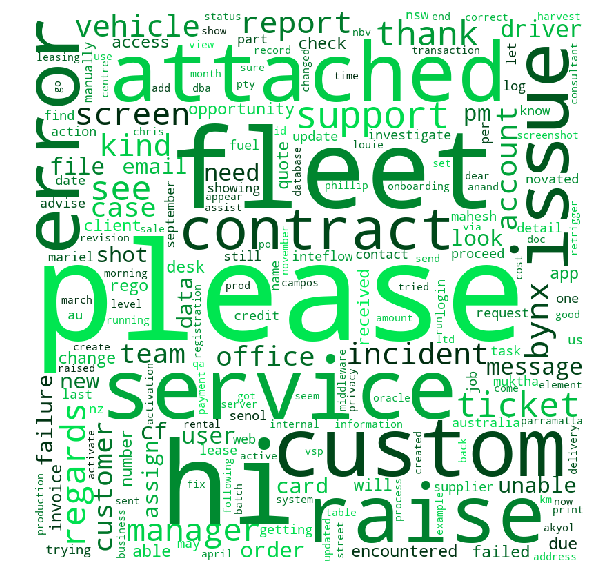

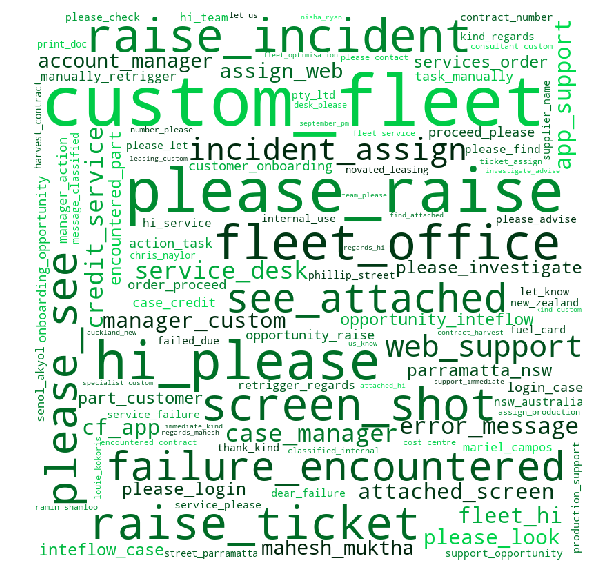

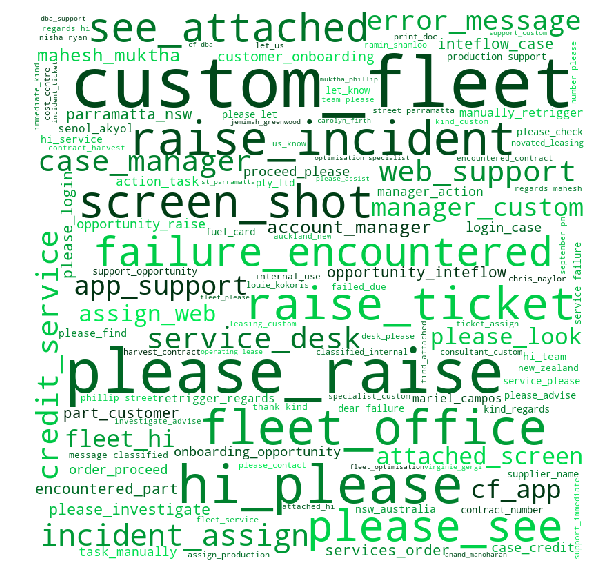

In [56]:
text=" "

text = text.join(documents)
word_cloud(1,text,writer)
word_cloud(2,text,writer)
word_cloud(3,text,writer)

In [57]:
import openpyxl
import nltk
from nltk import ngrams
string = "I really like python, it's pretty awesome."
string_bigrams = ngrams(string.split(),2)
res = ['_'.join(tups) for tups in string_bigrams]
print(res)
text1 = " ".join(res)
print(text1)

['I_really', 'really_like', 'like_python,', "python,_it's", "it's_pretty", 'pretty_awesome.']
I_really really_like like_python, python,_it's it's_pretty pretty_awesome.
